Здравствуйте! В этой лабораторной работе Вы напишите свою (возможно, первую) нейронку почти с нуля, чтобы закрепить понимание основных принципов работы и используемой для этого математики. В качестве задачи для нейронки будет классификация изображений из датасета [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) (описан далее).

Так как нейронку нужно написать почти с нуля, запрещается использовать фреймворки для разработки нейросетей (например, PyTorch и TensorFlow). Вы можете выполнить работу на любом языке программирования, при этом разрешается использовать только библиотеки для манипуляции с матрицами (потому что, я надеюсь, написать транспонирование, сложение и умножение матриц Вы уже в состоянии), а также инструменты визуализации (например, чтобы построить график). Если Вы выполняете эту работу на Python в Google Colab, то Вам будет достаточно NumPy и Matplotlib и ничего импортировать Вам больше не нужно.

За неделю до выдачи задания я дал Вам ссылку на бесплатный курс [Intro to Deep Learning with PyTorch](https://www.udacity.com/course/deep-learning-pytorch--ud188), в котором во втором уроке изложены основы с формулами для построения нейросети. Информация там достаточно концентрированная, поэтому некоторые видео можно пересмотреть по несколько раз, чтобы лучше понять. Возможно, Вы даже выполнили задания в курсе, чтобы закрепить полученную информацию (чисто для себя, я этого не требовал).

Дополнительно могу порекомендовать YouTube канал [3Blue1Brown](https://www.youtube.com/c/3blue1brown) с плейлистом [Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi), в котором достаточно подробно и понятно описывается необходимая Вам математика, при этом всё сопровождается отличной визуализацией.

Также вам может быть интересен вывод формул обратного распространения ошибки в матричном виде, доступный в файле `lab_5a_math.pdf`.

И напоследок, не стесняйтесь задавать вопросы преподавателю. И успехов!

Давайте начнём со знакомых Вам импортов NumPy и Matplotlib.

Подсказка: вот список функций NumPy, которые понадобятся Вам в этой работе:
* [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html);
* [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html);
* [exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html);
* [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html);
* [ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html);
* [ndarray.max](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html);
* [ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html);
* [ndarray.size](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html);
* [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html);
* [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html);
* [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html);
* [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Теперь поговорим о датасете. Часто в начале изучения нейронок используют датасет [рукописных чисел MNIST](http://yann.lecun.com/exdb/mnist/), но это слишком просто и скучно. Мы же попробуем обучить нейронку на датасете [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), который идентичен первому по формату (достаточно просто заменить файлы с данными), но не такой простой и больше соответствует задачам компьютерного зрения.

Входные данные - изображения с разрешением 28x28 пикселей в оттенках серого, на которых изображены различные элементы одежды и, внезапно, сумки (меня не спрашивайте, я не знаю).

Выходные данные - номер класса. Всего есть 10 классов: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

Датасет разделён на две части: 60 000 картинок для обучения и 10 000 картинок для тестирования.

Чтобы скачать датасет, достаточно использовать [wget](https://linux.die.net/man/1/wget).

In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2023-05-23 18:01:50--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.180
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.169.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  11.4MB/s    in 2.2s    

2023-05-23 18:01:53 (11.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2023-05-23 18:01:53--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.180
Connecting to fashion-mnist.s3-website.eu-central-1.a

Теперь возьмём готовую функцию для чтения датасета из файлов в NumPy массивы.

In [ ]:
# Source: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Используя эту функцию, загрузим датасет в память.

In [ ]:
images_train, labels_train = load_mnist('.', kind='train')
images_test, labels_test = load_mnist('.', kind='t10k')

Посмотрим, какая форма у полученных массивов.

In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Как видим, всё достаточно понятно:
* 60000 - количество картинок с подписями для обучения;
* 10000 - количество картинок с подписями для тестирования;
* 784 - количество пикселей в одной картинке ($28 \times 28 = 784$).

Также для удобства объявим список названий классов, чтобы выводить на экран не числа, а понятные слова.

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Чисто из любопытства посмотрим на одно из изображений и подпись к нему.

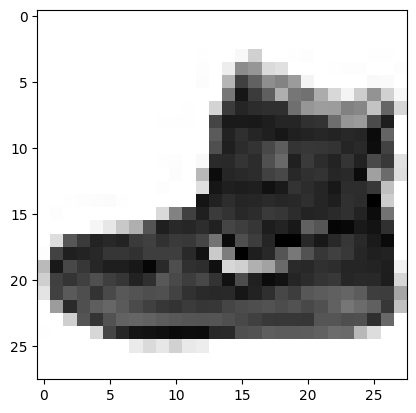

9 Ankle boot


In [ ]:
plt.imshow(images_train[0].reshape(28,28), cmap='Greys')
plt.show()
print(labels_train[0], classes[labels_train[0]])

Узнали Ankle boot? Согласны?

Хорошо, теперь данные нужно подготовить для использования в нейросети:
* отделить небольшой кусок (5 000) от данных для обучения, чтобы использовать его для валидации;
* нормализовать входные данные (изображения), чтобы значения были не в диапазоне 0 - 255, а диапазоне 0 - 1;
* представить выходные данные (подписи) в унитарном коде (one-hot), например 3 станет [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

Начнём с того, что реализуем вспомогательную функцию `one_hot_encode`, которая принимает на входе одномерный NumPy массив `a` и возвращает двухмерный NumPy массив с унитарным кодом.

In [ ]:
def one_hot_encode(arr):
  res = np.zeros((len(arr), len(classes))) + 0.1
  for indx in range(len(arr)):
    res[indx][arr[indx]] = 1.0
  return res

def normalize_vals(arr):
  # Preventing the setting to zero so we won't get an unintended dropout
  res = (np.asfarray(arr) / 255.0 * 0.99) + 0.01
  return res

def split_train_val(arr, split_factor):
  # Data partition 1:9

  part_indx = int(len(arr) * split_factor)
  train = np.ndarray(shape=(part_indx, arr.shape[1]), buffer=arr[:part_indx][:])
  val = np.ndarray(shape=(arr.shape[0] - part_indx, arr.shape[1]), buffer=arr[part_indx:][:])

  return train, val

Теперь выполним описанную выше подготовку данных.

In [ ]:
y_train = one_hot_encode(labels_train)
y_test = one_hot_encode(labels_test)

x_train = normalize_vals(images_train)
x_test = normalize_vals(images_test)

y_train, y_val = split_train_val(y_train, 0.9)
x_train, x_val = split_train_val(x_train, 0.9)

Проверьте, что получилось похоже на правду.

In [ ]:
print(x_train.shape, x_train.min(), x_train.max())
print(y_train.shape)
print(x_val.shape, x_val.min(), x_val.max())
print(y_val.shape)
print(x_test.shape, x_test.min(), x_test.max())
print(y_test.shape)

(54000, 784) 0.01 1.0
(54000, 10)
(6000, 784) 0.01 1.0
(6000, 10)
(10000, 784) 0.01 1.0
(10000, 10)


Получилось? Отлично!

Теперь реализуем ещё пару вспомогательных функций:
* `sigmoid` - сигмодиа (будем использовать её в качестве функции активации);
* `sigmoid_prime` - производная сигмоиды (для обратного распространения ошибки).

Обе функции принимают на входе NumPy массив произвольной формы и возвращают NumPy массив такой же формы, применив соответствующие функции независимо для каждого элемента.

In [ ]:
from scipy.special import expit, softmax

def sigmoid(x):
  return expit(x)

def smax(x):
  return softmax(x)

Теперь перейдём к самой главной и сложной части - написанию класса нейросети. Нейросеть у нас будет достаточно простой - многослойный перцептрон. У нас будут такие слои:
* входной слой на 784 входа, по одному на каждый пиксель входного изображения;
* скрытый слой с 512 нейронами (функция активации - сигмоида);
* скрытый слой с 128 нейронами (функция активации - сигмоида);
* выходной слой с 10 нейронами (функция активации - сигмоида), по одному на каждый класс.

Вам нужно реализовать 3 функции:
* `__init__` - конструктор, который будет инициализировать веса ($W$ и $b$) псевдо-случайными числами, чтобы происходило обучение;
* `feedforward` - функция прямого распространения данных по нейросети, аргумент `x` - одно или несколько входных изображений (т.е. одномерный или двухмерный массив), возвращает результат работы нейросети (класс входного изображения в унитарном коде по мнению нейросети);
* `backpropagation` - функция обратного распространения ошибки, аргумент `x` - несколько входных изображений, аргумент `y` - сколько же подписей к этим изображениям в унитарном коде, аргумент `learning_rate` - коэффициент обучения, ничего не возвращает, но корректирует веса.

In [ ]:
class ANN:
  def __init__(self):
    self.size0 = 784
    self.size1 = 512
    self.size2 = 128
    self.size3 = 10
    np.random.seed(42)
    # Input - hidden0
    self.wih = np.random.normal(0.0, self.size0 ** (-0.5), (self.size1, self.size0))
    # Hidden0 - hidden1
    self.whh = np.random.normal(0.0, self.size1 ** (-0.5), (self.size2, self.size1))
    # Hidden1 - output
    self.who = np.random.normal(0.0, self.size2 ** (-0.5), (self.size3, self.size2))

  def single_feedforward(self, x):
    hidden0 = sigmoid(np.dot(self.wih, x.T))
    hidden1 = sigmoid(np.dot(self.whh, hidden0))
    output = sigmoid(np.dot(self.who, hidden1))

    return output

  def feedforward(self, x):
    res = []
    if x.ndim == 1:
      res = self.single_feedforward(x)
    elif x.ndim == 2:
      res = np.zeros((len(x), len(classes)))
      for indx, sample in enumerate(x):
        res[indx] = self.single_feedforward(sample)
    return res

  def single_backpropagation(self, x, y, learning_rate):
    inputs = np.array(x, ndmin=2).T
    targets = np.array(y, ndmin=2).T

    # Feedforward, calculating error
    hidden0_in = np.dot(self.wih, inputs)
    hidden0 = sigmoid(hidden0_in)
    hidden1_in = np.dot(self.whh, hidden0)
    hidden1 = sigmoid(hidden1_in)
    output_in = np.dot(self.who, hidden1)
    output = sigmoid(output_in)

    # Common error, used for MSE cost function
    output_err = (targets - output) * output * (1 - output)
    hidden1_err = np.dot(self.who.T, output_err) * hidden1 * (1 - hidden1)
    hidden0_err = np.dot(self.whh.T, hidden1_err) * hidden0 * (1 - hidden0)

    # L2 regularization
    reg3 = learning_rate * self.who
    reg2 = learning_rate * self.whh
    reg1 = learning_rate * self.wih

    # Weights correction calculations
    ho_corr = np.dot(output_err, hidden1.T) + reg3
    hh_corr = np.dot(hidden1_err, hidden0.T) + reg2
    ih_corr = np.dot(hidden0_err, inputs.T) + reg1

    # Applying corrections to the actual weights
    self.wih += ih_corr
    self.whh += hh_corr
    self.who += ho_corr

    return

  def backpropagation(self, x, y, learning_rate):
    if x.ndim == 1:
      self.single_backpropagation(x, y, learning_rate)
    elif x.ndim == 2:

      hidden0 = sigmoid(np.dot(self.wih, x.T))
      hidden1 = sigmoid(np.dot(self.whh, hidden0))
      output = sigmoid(np.dot(self.who, hidden1))

      output_err = (y.T - output) * output * (1 - output)
      hidden1_err = np.dot(self.who.T, output_err) * hidden1 * (1 - hidden1)
      hidden0_err = np.dot(self.whh.T, hidden1_err) * hidden0 * (1 - hidden0)

      ho_corr = np.dot(output_err, hidden1.T)
      hh_corr = np.dot(hidden1_err, hidden0.T)
      ih_corr = np.dot(hidden0_err, x)

      # L2 regularization
      reg3 = learning_rate * self.who
      reg2 = learning_rate * self.whh
      reg1 = learning_rate * self.wih

      # Applying correction
      #self.wih += np.sum(ih_corr, axis=0) / x.shape[0] + reg1
      #self.whh += np.sum(hh_corr, axis=0) / x.shape[0] + reg2
      #self.who += np.sum(ho_corr, axis=0) / x.shape[0] + reg3

      self.wih += ih_corr / x.shape[0] + reg1
      self.whh += hh_corr / x.shape[0] + reg2
      self.who += ho_corr / x.shape[0] + reg3

    return None

Реализовали? Отлично! Работает? Не думаю, что с первого раза :) Давайте проверять по порядку. Начнём с конструктора.

In [ ]:
ann = ANN()

Надеюсь, у Вас он выполнился без ошибок. Теперь давайте проверим `feedforward`, просто скормив нейронке одно изображение.

In [ ]:
ann.feedforward(x_train[0])

array([0.69871396, 0.75447685, 0.47725676, 0.47410266, 0.24787596,
       0.47378432, 0.63356508, 0.6480725 , 0.37822987, 0.37781145])

Если вы получили 10 чисел со значениями примерно 0.5, то так и должно быть, потому что нейросеть пока не обучена. В итоге должно получиться больше похоже на подпись (правильный ответ) из датасета.

In [ ]:
y_train[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. ])

Ну что, время запустить обучение? Не так быстро. Как вообще понять, что нейронка обучается? Правильно, смотреть на функцию ошибки. Ну, и на точность тоже можно. Давайте реализуем эти вспомогательные функции.

* `mse` - [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), средний квадрат ошибки;
* `acc` - accuracy, точность определения номера класса.

Аргументы `a` и `b` - массивы классов в унитарном коде. Один - результат работы нейронки, другой - из датасета, или наоборот (без разницы).

In [ ]:
def mse(source, target):
  score = 0
  for indx in range(len(source)):
    max_indx = np.argmax(target[indx])
    score += (target[indx][max_indx] - source[indx][max_indx]) ** 2

  score /= len(source) * 1.0

  return score


def acc(source, target):
  correct = 0
  source_max = np.argmax(source, axis=1)
  target_max = np.argmax(target, axis=1)
  for src, trgt in zip(source_max, target_max):
    if src == trgt:
      correct += 1

  res = correct / source.shape[0]
  return res

Давайте их проверим на тестовом датасете для нашей необученной нейронки.

In [ ]:
print("MSE", mse(ann.feedforward(x_test), y_test))
print("ACC", acc(ann.feedforward(x_test), y_test))

MSE 0.25825028181727455
ACC 0.1


Собственно, MSE очень большая, а ACC очень маленькая. При 10 классах точность 0.1 - это просто рандом.

Давайте теперь проверим, работает ли `backpropagation`. Запустим обучение на одном батче (небольшом подмножестве данных) небольшое количество эпох и будем смотреть на MSE.

In [ ]:
for epoch in range(10):
  ann.backpropagation(x_train[:50], y_train[:50], learning_rate=0.001)
  print("Epoch", epoch, "MSE", mse(ann.feedforward(x_train[:50]), y_train[:50]))

Epoch 0 MSE 0.8457679036320773
Epoch 1 MSE 0.8093919531784253
Epoch 2 MSE 0.7582518248366226
Epoch 3 MSE 0.7130254151096783
Epoch 4 MSE 0.6828861980236255
Epoch 5 MSE 0.6664750506851683
Epoch 6 MSE 0.6549987848129116
Epoch 7 MSE 0.6463632211406928
Epoch 8 MSE 0.6405897347856606
Epoch 9 MSE 0.6371385350902352


Если Вы увидели, что MSE уменьшается с каждой эпохой, то Вы на правильном пути. Если нет, то, скорее всего, где-то ошибка.

Надеюсь, у Вас получилось добиться уменьшения ошибки. Теперь можно и реализовать полноценное обучение.

In [ ]:
ann = ANN() # начнём обучения с изначального состояния нейронки

mse_val_prev = np.Inf # будем помнить предыдущее значение mse на валидационной выборке, чтобы не переобучиться
mse_train_list = [] # будем хранить список значений mse и acc для выборок для обучения и валидации, чтобы потом построить график
mse_val_list = []
acc_train_list = []
acc_val_list = []

In [ ]:
def shuffle_data(x, y):
    p = np.random.permutation(len(x))
    return x[p], y[p]

batch_size = 100 # размер батча, т.е. по сколько картинок с подписями используется для коррекции весов за один раз

for epoch in range(30):
  x_train, y_train = shuffle_data(x_train, y_train) # shuffling both x and y the same way
  for batch in range(len(x_train) // batch_size):
    x_train_batch = np.ndarray(shape=(batch_size, x_train.shape[1]), buffer=x_train[batch * batch_size:(batch + 1) * batch_size][:])
    y_train_batch = np.ndarray(shape=(batch_size, y_train.shape[1]), buffer=y_train[batch * batch_size:(batch + 1) * batch_size][:])
    ann.backpropagation(x_train_batch, y_train_batch, learning_rate=0.00001)
  y_train_output = ann.feedforward(x_train)
  y_val_output = ann.feedforward(x_val)
  mse_train = mse(y_train_output, y_train)
  mse_val = mse(y_val_output, y_val)
  acc_train = acc(y_train_output, y_train)
  acc_val = acc(y_val_output, y_val)
  mse_train_list.append(mse_train)
  mse_val_list.append(mse_val)
  acc_train_list.append(acc_train)
  acc_val_list.append(acc_val)
  print("Epoch", epoch, "MSE_train", mse_train, "MSE_val", mse_val, "ACC_train", acc_train, "ACC_val", acc_val)
  if mse_val > mse_val_prev: # если ошибка на валидационной выборке начала увеличиваться, останавливаем обучение
    print("MSE_val is increasing! Stopping.")
    break
  mse_val_prev = mse_val

Epoch 0 MSE_train 0.23068356909251161 MSE_val 0.22735875614249465 ACC_train 0.7342037037037037 ACC_val 0.7388333333333333
Epoch 1 MSE_train 0.16654070570884633 MSE_val 0.16443231551842827 ACC_train 0.769962962962963 ACC_val 0.7703333333333333
Epoch 2 MSE_train 0.15021687892658955 MSE_val 0.14858173457406568 ACC_train 0.8082407407407407 ACC_val 0.8051666666666667
Epoch 3 MSE_train 0.1443106091942665 MSE_val 0.1428330760563601 ACC_train 0.825 ACC_val 0.8245
Epoch 4 MSE_train 0.1303282712637993 MSE_val 0.1299247444577951 ACC_train 0.8363333333333334 ACC_val 0.8285
Epoch 5 MSE_train 0.12145369859575632 MSE_val 0.12191864256262136 ACC_train 0.842574074074074 ACC_val 0.8381666666666666
Epoch 6 MSE_train 0.11913751199175374 MSE_val 0.1197504043273642 ACC_train 0.8461666666666666 ACC_val 0.839
Epoch 7 MSE_train 0.1127019770944797 MSE_val 0.11366028242953384 ACC_train 0.8502962962962963 ACC_val 0.84
Epoch 8 MSE_train 0.11473096426480904 MSE_val 0.11670593164493843 ACC_train 0.8505925925925926 A

У меня выполнение обучения заняло примерно 8 минут, что не так много. Ради любопытства можете увеличить количество эпох, например до 500 и посмотреть, что будет. Но учтите, что Google Colab это может не понравиться.

Давайте построим графики зависимостей MSE и ACC от эпохи.

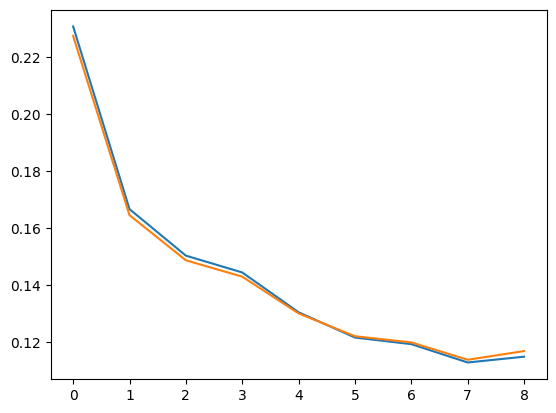

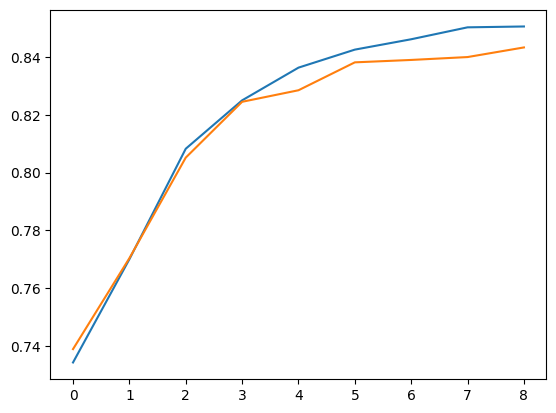

In [ ]:
plt.plot(mse_train_list)
plt.plot(mse_val_list)
plt.show()
plt.plot(acc_train_list)
plt.plot(acc_val_list)
plt.show()

Как видно, нейросеть неплохо обучилась и, наверное, может немного обучиться немного ещё.

Давайте теперь на тестовых данных проверим точность. Тестовые данные нейросеть не видела, поэтому только их можно использовать для окончательной оценки точности работы нейронки.

In [ ]:
y_test_output = ann.feedforward(x_test)
acc(y_test_output, y_test)

0.8355

Как я думаю, можно уверенно сказать, что у Вас должно получиться обучить нейронку до 80% точности.

Давайте подробнее проанализируем результат, что нейронка классифицирует без особых проблем, а где много ошибается. Это можно сделать, построив матрицу 10x10, в которой:
* строка - номер класса, изображение которого показали нейронке;
* столбец - номер класса, который выдала нейронка;
* значение в элементе - доля таких случаев.

При этом сумма значений по каждой строке равна 1.

In [ ]:
result_matrix = np.zeros((len(classes), len(classes)), dtype=np.float64)
max_test = np.argmax(y_test, axis=1)
max_pred = np.argmax(y_test_output, axis=1)
class_count = np.zeros((len(classes), ), dtype=np.float64)
for indx in range(len(y_test)):
    result_matrix[max_test[indx]][max_pred[indx]] += 1
    class_count[max_test[indx]] += 1


class ClassMetrics:
    def __init__(self, confusion_mat):
        self.f_score = np.zeros((len(confusion_mat), ), dtype=np.float64)
        self.precision = np.zeros((len(confusion_mat), ), dtype=np.float64)
        self.recall = np.zeros((len(confusion_mat), ), dtype=np.float64)

        self._get_metrics(confusion_mat)
        return

    def _get_metrics(self, confusion_mat):
        f_score = np.zeros((len(confusion_mat), ), dtype=np.float64)
        precision = np.zeros((len(confusion_mat), ), dtype=np.float64)
        recall = np.zeros((len(confusion_mat), ), dtype=np.float64)
        tp = 0
        fp = 0
        fn = 0
        for i in range(len(confusion_mat)):
            tp = confusion_mat[i][i]
            fn = 0
            fp = 0
            for j in range(len(confusion_mat)):
                if j != i:
                    fp += confusion_mat[i][j]
                    fn += confusion_mat[j][i]

            precision[i] = tp * 1.0 / (tp + fp)
            recall[i] = tp * 1.0 / (tp + fn)

        f_score = precision * recall * 2 / (precision + recall)

        self.precision = precision
        self.recall = recall
        self.f_score = f_score

        return None

metrics = ClassMetrics(result_matrix)
result_matrix /= class_count.T

Красиво отобразим эту матрицу.

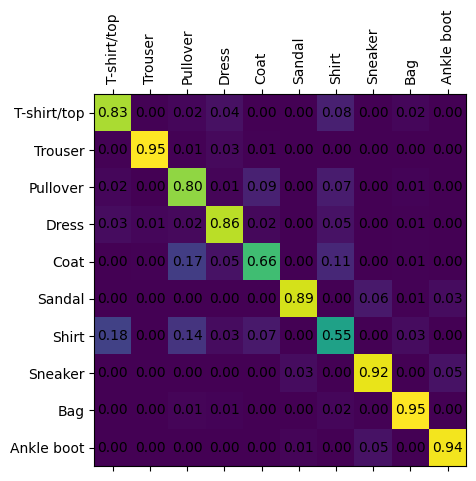

In [ ]:
plt.matshow(result_matrix)
for (x, y), v in np.ndenumerate(result_matrix):
  plt.text(y, x, f"{v:.2f}", va="center", ha="center")
plt.xticks(np.arange(10), classes, rotation='vertical')
plt.yticks(np.arange(10), classes)
plt.show()

Что-то с Shirt не задалось, а в остальном лучше. Также немного путает Pullover и Coat.

Precision, Recall, F-score для каждого класса:

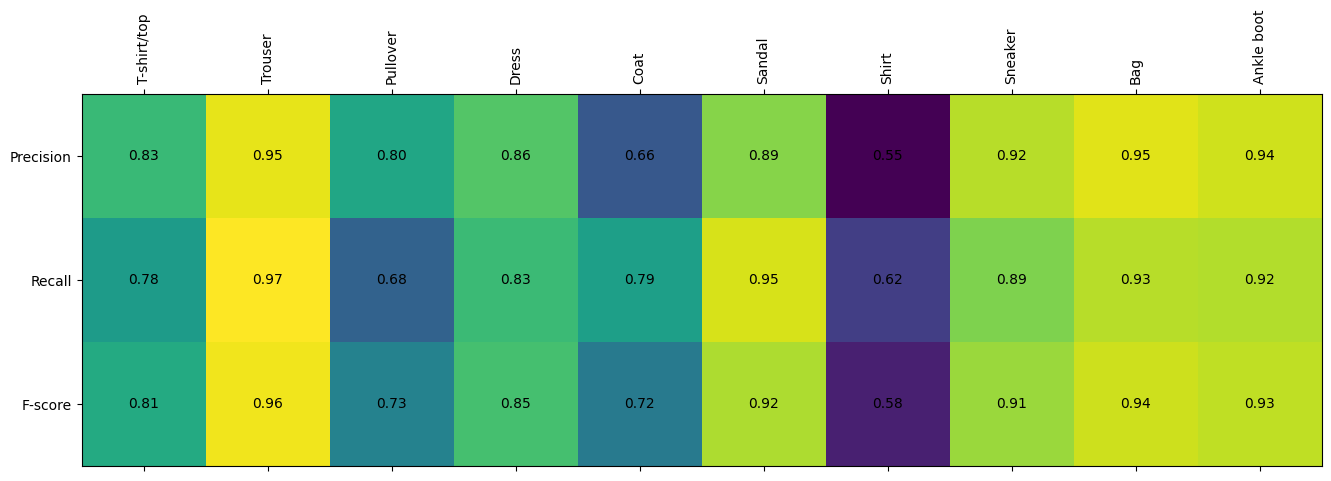

In [ ]:
mat = np.concatenate((metrics.precision.reshape(1, 10), metrics.recall.reshape(1, 10), metrics.f_score.reshape(1, 10)))
plt.matshow(mat)
for (x, y), v in np.ndenumerate(mat):
  plt.text(y, x, f"{v:.2f}", va="center", ha="center")
plt.xticks(np.arange(10), classes, rotation='vertical')
plt.yticks(np.arange(3), ["Precision", "Recall", "F-score"])
plt.show()

Допустим, нас устраивает результат обучения и мы хотим его сохранить, чтобы не обучить заново. NumPy позволяет сделать это достаточно просто.

In [ ]:
with open('ann.npy', 'wb') as f:
  np.save(f, ann.wih)
  np.save(f, ann.whh)
  np.save(f, ann.who)

Весы сохранены в файл `ann.py`, который Вы теперь можете скачать себе, чтобы он не пропал из Google Colab. Для этого нажмите View -> Table of contents, переключаетесь на Files, у ann.npy на три точки и Download.

Потом Вы можете загрузить этот файл обратно и прочитать из него веса.

In [ ]:
with open('ann_last_ver_final.npy', 'rb') as f:
  ann.wih = np.load(f)
  ann.whh = np.load(f)
  ann.who = np.load(f)

Собственно, на этом всё. Если у Вас получилось всё сделать, то поздравляю!

Теперь реализуйте функцию, которая определяет классы (0-9) для входных изображений.

In [ ]:
def your_function(images):
  source = normalize_vals(images)

  predictions = ann.feedforward(source)
  labels = np.argmax(predictions, axis=1)

  return labels

И запустите автоматическую проверку.

In [ ]:
auto_test(your_function)

Passed! First time passed: "2023-05-22T08:17:28.460369"
